# How (not) to lie with pretty pictures
## The psychology of data visualisation

### Introduction

As data scientists, we regularly find ourselves having to present data to many different people. Some of whom won't have a high level of data literacy. In such situations good visualisations become indispensable.

But what exactly is a 'good' visualisation? I think most of us have our intuitions - but as data scientists we should all realise that intuitions have limits. Thankfully this is an area of active research. In particular, [The Science of Data Visual Communication](https://journals.sagepub.com/stoken/default+domain/10.1177%2F15291006211051956-FREE/pdf) was my primary resource for most of the information that follows.

The intention of this document is to summarise some of the key ideas in the paper, whilst giving examples to demonstrate both what does work and what doesn't. It will give a brief idea of the theory behind the examples, to make for better generalisations but won't be going too deep. For that, I refer you to the aforementioned paper and its numerous references.

#### So why do we even bother?

The first (and most important) question we might ask is why we even bother with data visualisation at all? We could always just look at the data or use statistical summaries to interogate it, so what value does a pretty picture add? For that, consider the following data:

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
x = np.array([10,8,13,9,11,14,6,4,12,7,5])
y_1 = np.array([8.04,6.95,7.58,8.81,8.33,9.96, 7.24,4.26,10.84,4.82,5.68])
y_2 = np.array([9.14, 8.14, 8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74])
y_3 = np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])

data = pd.DataFrame({'x': x,
                     'y_1':y_1,
                     'y_2':y_2,
                     'y_3':y_3
})

print(data.head(11))
print(data.describe())
print(data.corr())

     x    y_1   y_2    y_3
0   10   8.04  9.14   7.46
1    8   6.95  8.14   6.77
2   13   7.58  8.74  12.74
3    9   8.81  8.77   7.11
4   11   8.33  9.26   7.81
5   14   9.96  8.10   8.84
6    6   7.24  6.13   6.08
7    4   4.26  3.10   5.39
8   12  10.84  9.13   8.15
9    7   4.82  7.26   6.42
10   5   5.68  4.74   5.73
               x        y_1        y_2        y_3
count  11.000000  11.000000  11.000000  11.000000
mean    9.000000   7.500909   7.500909   7.500000
std     3.316625   2.031568   2.031657   2.030424
min     4.000000   4.260000   3.100000   5.390000
25%     6.500000   6.315000   6.695000   6.250000
50%     9.000000   7.580000   8.140000   7.110000
75%    11.500000   8.570000   8.950000   7.980000
max    14.000000  10.840000   9.260000  12.740000
            x       y_1       y_2       y_3
x    1.000000  0.816421  0.816237  0.816287
y_1  0.816421  1.000000  0.750005  0.468717
y_2  0.816237  0.750005  1.000000  0.587919
y_3  0.816287  0.468717  0.587919  1.000000


What I have here is 3 outputs, all for the same input variable x. Moreover, you should see the 3 outputs have the same mean and standard deviation. They even have the same correlation coefficient with x! Ergo, you might expect that all 3 are fairly similar distributions. But not so.

<AxesSubplot:xlabel='x', ylabel='y_3'>

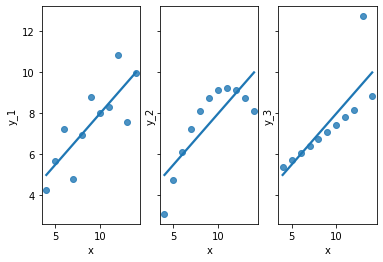

In [31]:
fig, axs = plt.subplots(ncols=3, sharey='row')

sns.regplot(data = data, x='x', y='y_1', ax = axs[0], ci=None)
sns.regplot(data = data, x='x', y='y_2', ax = axs[1], ci=None)
sns.regplot(data = data, x='x', y='y_3', ax = axs[2], ci=None)